# Objectives
YW
* scrape a website for relevant information, store that information to a dataframe and save that dataframe as a csv file
* load in a dataframe and do the following
    * calculate the zscores of a given column
    * calculate the zscores of a point from a given column in the dataframe
    * calculate and plot the pmf and cdf of another column

# Part 1 - Webscraping
* use the following url scrape the first page of results
* for each item get the name of the item
* store the names to a dataframe and save that dataframe to csv then display
    * store the dataframe in the `data` folder in the repo
    * name the file `part1.csv` and make sure that when you write it you set `index=False`
* the head of the dataframe

* it should match the following
<img src="solutions/images/part1.png"/>

In [60]:
url = "https://www.petsmart.com/dog/treats/dental-treats/#page_name=flyout&category=dog&cta=dentaltreat"

In [61]:
import requests
from bs4 import BeautifulSoup

In [62]:
r = requests.get(url)

In [63]:
soup = BeautifulSoup(r.content, 'html.parser')

In [65]:
product_name_boxes = soup.find_all("div", attrs={"class":"product-name"})

In [69]:
product_names = [product_name_box.text for product_name_box in product_name_boxes]
product_names

['\nGreenies Regular Dental Dog Treats\n',
 '\nGreenies Petite Dental Dog Treats\n',
 '\nGreenies Large Dental Dog Treats\n',
 '\nPedigree Dentastix Large Dog Treats\n',
 '\nGreenies 6 Month+ Puppy Petite Dental Dog Treats\n',
 '\nGreenies 6 Month+ Puppy Dental Dog Treats\n',
 '\nGreenies 6 Month+ Puppy Teenie Dental Dog Treats\n',
 '\nGreenies Teenie Dental Dog Treats\n',
 '\nAuthority® Dental & DHA Stick Puppy Treats Parsley Mint - Gluten Free, Grain Free\n',
 '\nPedigree Dentastix Large Dog Sticks\n',
 '\nMilk-Bone Brushing Chews Large Dental Dog Treats\n',
 '\nPedigree Dentastix Triple Action Dental Dog Treats - Variety Pack\n',
 '\nPedigree Dentastix Small/Medium Dog Sticks\n',
 '\nWHIMZEES Variety Value Box Dental Dog Treat - Natural, Grain Free\n',
 '\nPedigree Dentastix Mini Dog Sticks\n',
 '\nVirbac® C.E.T.® VeggieDent® Tartar Control Dog Chews\n',
 '\nMilk-Bone Brushing Chews Dental Dog Treat\n',
 '\nAuthority® Dental & DHA Rings Puppy Treats Parsley Mint - Gluten Free, Grain

In [71]:
# load the data into a dataframe file
dff = pd.DataFrame() 
dff['names'] = product_names
dff.head()

,names
0,\nGreenies Regular Dental Dog Treats\n
1,\nGreenies Petite Dental Dog Treats\n
2,\nGreenies Large Dental Dog Treats\n
3,\nPedigree Dentastix Large Dog Treats\n
4,\nGreenies 6 Month+ Puppy Petite Dental Dog Tr...


In [72]:
product_names = [{"name":product_name_box.text} for product_name_box in product_name_boxes]
product_names

[{'name': '\nGreenies Regular Dental Dog Treats\n'},
 {'name': '\nGreenies Petite Dental Dog Treats\n'},
 {'name': '\nGreenies Large Dental Dog Treats\n'},
 {'name': '\nPedigree Dentastix Large Dog Treats\n'},
 {'name': '\nGreenies 6 Month+ Puppy Petite Dental Dog Treats\n'},
 {'name': '\nGreenies 6 Month+ Puppy Dental Dog Treats\n'},
 {'name': '\nGreenies 6 Month+ Puppy Teenie Dental Dog Treats\n'},
 {'name': '\nGreenies Teenie Dental Dog Treats\n'},
 {'name': '\nAuthority® Dental & DHA Stick Puppy Treats Parsley Mint - Gluten Free, Grain Free\n'},
 {'name': '\nPedigree Dentastix Large Dog Sticks\n'},
 {'name': '\nMilk-Bone Brushing Chews Large Dental Dog Treats\n'},
 {'name': '\nPedigree Dentastix Triple Action Dental Dog Treats - Variety Pack\n'},
 {'name': '\nPedigree Dentastix Small/Medium Dog Sticks\n'},
 {'name': '\nWHIMZEES Variety Value Box Dental Dog Treat - Natural, Grain Free\n'},
 {'name': '\nPedigree Dentastix Mini Dog Sticks\n'},
 {'name': '\nVirbac® C.E.T.® VeggieDent® 

In [73]:
dff = pd.DataFrame(product_names)
dff.head()

,name
0,\nGreenies Regular Dental Dog Treats\n
1,\nGreenies Petite Dental Dog Treats\n
2,\nGreenies Large Dental Dog Treats\n
3,\nPedigree Dentastix Large Dog Treats\n
4,\nGreenies 6 Month+ Puppy Petite Dental Dog Tr...


In [74]:
# save the data as a csv file
dff.to_csv("data/part1.csv", index=False)

In [38]:
# display df.head()

# Part 2

load in the csv file located in the `data` folder called `part2.csv`

create a function that calculates the zscores of an array

then calculate the zscores for each column in part2.csv and add them as columns

See below for final result

<img src="solutions/images/part2_df_preview.png"/>

In [7]:
import pandas as pd
import numpy as np 


import matplotlib.pyplot as plt 
import seaborn as sns 

In [8]:
df = pd.read_csv("data/part2.csv")
df.head()

,salaries,NPS Score,eventOutcome
0,44112.0,-7.0,1
1,46777.0,-12.0,2
2,50013.0,50.0,5
3,48983.0,-13.0,0
4,50751.0,-11.0,6


In [9]:
# create a function that calculates the zscores of an array
def zscores(arr):
    return (arr - arr.mean())/arr.std()

In [10]:
# calculate the zscore for each column and store them as a new column with the names used above
for col in df.columns:
    new_col_name = '_'.join([col, "zscores"])
    col_zscores = zscores(df[col])
    df[new_col_name] = col_zscores
df.head()

,salaries,NPS Score,eventOutcome,salaries_zscores,NPS Score_zscores,eventOutcome_zscores
0,44112.0,-7.0,1,-1.460155,-0.913522,-1.103166
1,46777.0,-12.0,2,-0.793981,-1.080668,-0.668095
2,50013.0,50.0,5,0.014926,0.991947,0.637118
3,48983.0,-13.0,0,-0.242545,-1.114097,-1.538237
4,50751.0,-11.0,6,0.199405,-1.047239,1.072189


# Part 3 
plot 'salaries' and 'NPS Score' on a subplot (1 row 2 columns) 
then repeat this for the zscores

see image below for reference
<img src="solutions/images/part2-plots.png"/>

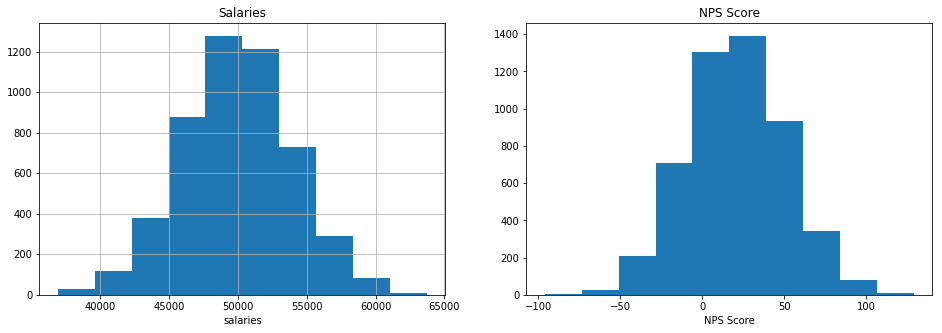

In [14]:
# plot for raw salaries and NPS Score data goes here
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(16, 5))

plt.subplot(121)
plt.grid()
plt.hist(df['salaries'])
plt.title("Salaries")
plt.xlabel("salaries")

plt.subplot(122)
plt.hist(df['NPS Score'])
plt.title("NPS Score")
plt.xlabel("NPS Score")

plt.show()

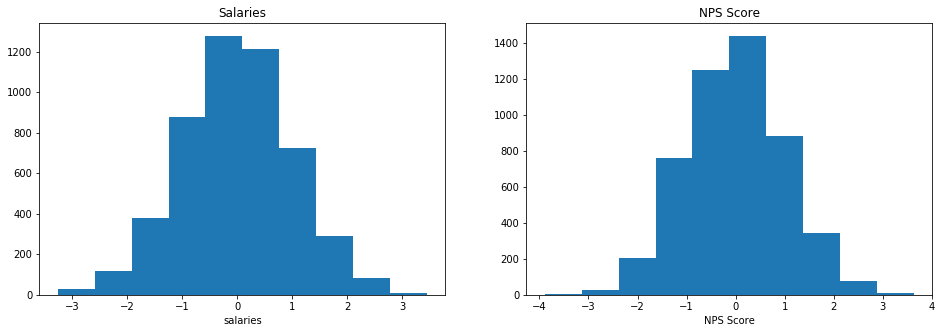

In [16]:
# plot for zscores for salaries and NPS Score data goes here
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(16, 5))

plt.subplot(121)
plt.hist(df['salaries_zscores'])
plt.title("Salaries")
plt.xlabel("salaries")

plt.subplot(122)
plt.hist(df['NPS Score_zscores'])
plt.title("NPS Score")
plt.xlabel("NPS Score")

plt.show()

# Part 4 - PMF
using the column 'eventOutcomes'

create a PMF and plot the PMF as a bar chart

See image below for referenc

<img src="solutions/images/part4_pmf.png"/>

In [38]:
event_counts = df['eventOutcome'].value_counts(normalize=True).sort_index()
event_counts

0    0.1248
1    0.1216
2    0.1184
3    0.1272
4    0.1332
5    0.1182
6    0.1244
7    0.1322
Name: eventOutcome, dtype: float64

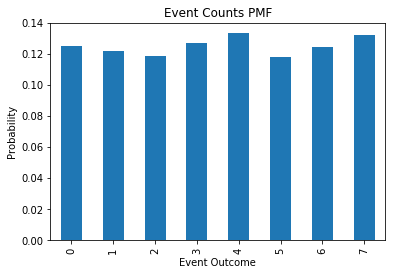

In [39]:
ax = event_counts.plot(kind='bar')
ax.set_title("Event Counts PMF")
ax.set_ylabel("Probability")
ax.set_xlabel("Event Outcome")
plt.show()

# Part 5 - CDF
plot the CDF of Event Outcomes as a scatter plot using the information above

See image below for reference 

<img src="solutions/images/part5_cmf.png"/>

In [40]:
event_cumsum = np.cumsum(event_counts)
event_cumsum

0    0.1248
1    0.2464
2    0.3648
3    0.4920
4    0.6252
5    0.7434
6    0.8678
7    1.0000
Name: eventOutcome, dtype: float64

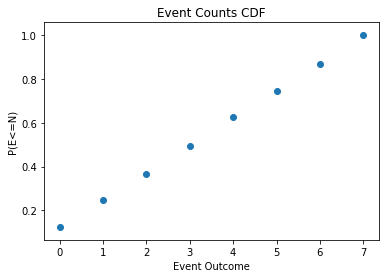

In [46]:
plt.scatter(event_cumsum.index, event_cumsum.values)
plt.title("Event Counts CDF")
plt.ylabel("P(E<=N)")
plt.xlabel("Event Outcome")
plt.show()

# Bonus:
* using np.where find salaries with zscores <= -2.0

* calculate the skewness and kurtosis for the NPS Score column

In [52]:
# find salaries with zscores <= -2.0
df.iloc[np.where(df['salaries_zscores']<=-2.0)][['salaries_zscores']]

,salaries_zscores
20,-2.642269
41,-2.972231
89,-2.123578
107,-2.274561
285,-2.266562
...,...
4692,-2.902739
4707,-2.034839
4731,-2.192071
4765,-2.461040


In [53]:
# calculate skewness and kurtosis of NPS Score column
import scipy.stats as scs

In [57]:
scs.skew(df['NPS Score'])

0.02450527688165856

In [55]:
scs.kurtosis(df['NPS Score'])

-0.04212714461681166

# run the cell below to convert your notebook to a README for assessment

In [ ]:
!jupyter nbconvert --to markdown assessment.ipynb && mv assessment.md README.md